# NIMH Project - Machine Learning - Testing

In [1]:
import os

import re
import nltk
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from nltk.stem.wordnet import WordNetLemmatizer

import math
import chardet
os.chdir('Z:/project')

In [2]:
#%%

#data = pd.read_csv("./results/pat_visit_score_match_1127.csv")
data = pd.read_csv("./results/train_2925.csv")
data.head()

,Unnamed: 0,pat_visit,m1,n1,txt1,fsize,m1_1,n1_1
0,0,2194751_1850486,0,0,MENTAL STATUS EXAM: Mr. Taylor is slightly di...,17,0,0
1,1,11315199_2148732,0,0,MRN: 11315199\r\n...... MR...,10,0,0
2,2,11173259_2375848,0,0,MRN: 11173259\r\n...... Me...,16,0,0
3,3,11145190_1885052,0,0,MRN: 11145190\r\n...... MR...,14,0,0
4,4,6198790_1907260,0,0,Mental Status Exam:\r\nAppearance: Dressed cas...,20,0,0


In [3]:
data.shape


(2925, 8)

In [4]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,Unnamed: 0,pat_visit,m1,n1,txt1,fsize,m1_1,n1_1
766,766,14221485_2180859,0,1,MRN: 14221485\r\n...... Me...,13,0,0
1536,1536,12585717_190743768,0,2,MRN: 12585717\r\n...... MRN: 12585717\r\n........,38,0,1
1459,1459,17063058_2422970,0,2,MRN: 17063058\r\n...... Me...,23,0,1
23,23,6311286_1941616,0,0,MRN: 6311286\r\n...... MRN...,23,0,0
1347,1347,20463231_189138737,0,1,MRN: 20463231\r\n...... MRN: 20463231\r\n........,43,0,0


In [5]:
labelm=data[data.columns[6]].tolist()
labeln=data[data.columns[7]].tolist()
#labelm2=data[data.columns[11]].tolist()
#labeln2=data[data.columns[12]].tolist()

In [8]:
arr_m1 = np.array(labelm)
arr_n1 = np.array(labeln)
#arr_m2 = np.array(labelm2)
#arr_n2 = np.array(labeln2)
sum(arr_m1 == arr_n1)/len(arr_m1)  #, sum(arr_m2 == arr_n2)/len(arr_m2)

0.6218803418803419

In [9]:
#%%
corpusList=data[data.columns[4]].tolist()

In [33]:
#corpusList2=data[data.columns[7]].tolist()

In [10]:
len(corpusList)

2925

In [14]:
#len(corpusList2)

In [15]:
#%%
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [ token for token in tokens if re.search('(^[a-zA-Z]+$)', token) ]
    a=[]
    for i in filtered_tokens:
        a.append(WordNetLemmatizer().lemmatize(i,'v'))
    return a
    #return filtered_tokens


cachedStopWords = stopwords.words("english")

In [16]:
#%%
cv = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 4), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)
X1 = cv.fit_transform(corpusList)
lexicon = cv.get_feature_names()
#print (lexicon)
print()

#%%
x=X1  ## for select fetures 
print(x.shape)

pkl.dump( x, open( "./results/tfidf_2925.pickle", "wb" ) )
pkl.dump( lexicon, open( "./results/lexicon_2925.pickle", "wb" ) )
#x1 = pkl.load( open( "./results/tfidf_4801395.pickle", "rb" ) )
#lexicon1 = pkl.load( open( "./results/lexicon_4801395.pickle", "rb" ) )


(2925, 2499106)


In [43]:
#%%
"""cv2 = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 4), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)
X2 = cv2.fit_transform(corpusList2)
lexicon2 = cv2.get_feature_names()
#print (lexicon)
print()

#%%
x2=X2  ## for select fetures 
print(x2.shape)

pkl.dump( x2, open( "./results/tfidf_1885_2.pickle", "wb" ) )
pkl.dump( lexicon2, open( "./results/lexicon_1885_2.pickle", "wb" ) )
#x1 = pkl.load( open( "./results/tfidf_4801395.pickle", "rb" ) )
#lexicon1 = pkl.load( open( "./results/lexicon_4801395.pickle", "rb" ) )"""
x.shape

(2925, 2499106)

In [18]:
type(x)

scipy.sparse.csr.csr_matrix

In [17]:
Ym = np.array(labelm)
Yn = np.array(labeln)
#Ym2 = np.array(labelm2)
#Yn2 = np.array(labeln2)
pkl.dump( Ym, open( "./results/ym_2925.pickle", "wb" ) )
pkl.dump( Yn, open( "./results/yn_2925.pickle", "wb" ) )
#pkl.dump( Ym2, open( "./results/ym_1885_2.pickle", "wb" ) )
#pkl.dump( Yn2, open( "./results/yn_1885_2.pickle", "wb" ) )
#print(Y)  ## class level

In [ ]:
"""#%%
#test
cvt = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 3), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)

X1t = cvt.fit_transform(corpusList_test)
print(X1t.shape)
print()
lexicon_test = cvt.get_feature_names()
#print (lexicon)
print()

#%%
xt=X1t  ## for select fetures 
print(xt.shape)

Ym = np.array(labels_testm)
Yn = np.array(labels_testn)"""

In [18]:
print(Ym[0:10], Ym[480:490], Ym[1865:])  ## class level
print(Yn[0:10], Yn[480:490], Yn[1865:])  ## class level
#print(Ym2[0:10], Ym2[480:490], Ym2[1865:])  ## class level
#print(Yn2[0:10], Yn2[480:490], Yn2[1865:])  ## class level

[0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 1 0 0] [1 1 0 ... 0 0 1]
[0 1 1 0 0 0 0 1 0 0] [0 0 0 0 0 0 1 1 0 0] [1 1 0 ... 0 1 1]


In [19]:
#%%
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#print(x.shape)

In [20]:
X_new = SelectKBest(chi2, k=800).fit_transform(x, Yn)   # select 800 features

#%%
X=X_new        # make unque name for next cell 
print(X.shape)
#Y

(2925, 800)


In [21]:
pkl.dump( X, open( "./results/tfidf_2925_800.pickle", "wb" ) )

In [44]:
x = pkl.load( open( "./results/tfidf_2925.pickle", "rb" ) )
Yn = pkl.load( open( "./results/yn_2925.pickle", "rb" ) )

X_new2 = SelectKBest(chi2, k=1200).fit_transform(x, Yn)
pkl.dump( X_new2, open( "./results/tfidf_2925_1200.pickle", "wb" ) )

# Start Here

In [2]:
X_new = pkl.load( open( "./results/tfidf_2925_1200.pickle", "rb" ) )
Ym = pkl.load( open( "./results/ym_2925.pickle", "rb" ) )
Yn = pkl.load( open( "./results/yn_2925.pickle", "rb" ) )

In [3]:
X = X_new[:1900]
X2 = X_new[1900:]
Y = Yn[:1900]
Y2 = Yn[1900:]
Ym1 = Ym[:1900]
Ym2 = Ym[1900:]

In [37]:
""""X2_new = SelectKBest(chi2, k=600).fit_transform(xt, Ym)   # select 600 features
X2_new.shape

#%%
X2=X2_new        # make unque name for next cell 
X2_new.shape""""

(1395, 600)

In [4]:
#%%
# ExtraTreesClassifier
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [10, 30, 60, 100, 300, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": ExtraTreesClassifier = " + str(trees[t]))
    test_count = 0
    rf = ExtraTreesClassifier(bootstrap=False,
           criterion='entropy', max_depth=15, max_features=0.9,
           max_leaf_nodes=None, min_impurity_decrease=1e-045,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=trees[t], n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : ExtraTreesClassifier = 10
   Fold 1 accuracy: 83.68 %
   Fold 2 accuracy: 78.95 %
   Fold 3 accuracy: 78.95 %
   Fold 4 accuracy: 76.84 %
   Fold 5 accuracy: 80.00 %
   Fold 6 accuracy: 82.11 %
   Fold 7 accuracy: 69.47 %
   Fold 8 accuracy: 73.16 %
   Fold 9 accuracy: 76.32 %
   Fold 10 accuracy: 76.84 %
     Overall test accuracy: 77.63 %
     Overall training accuracy: 99.74 %
model  1 : ExtraTreesClassifier = 30
   Fold 1 accuracy: 78.42 %
   Fold 2 accuracy: 77.89 %
   Fold 3 accuracy: 76.32 %
   Fold 4 accuracy: 81.58 %
   Fold 5 accuracy: 75.26 %
   Fold 6 accuracy: 76.32 %
   Fold 7 accuracy: 79.47 %
   Fold 8 accuracy: 80.00 %
   Fold 9 accuracy: 77.37 %
   Fold 10 accuracy: 72.63 %
     Overall test accuracy: 77.53 %
     Overall training accuracy: 99.89 %
model  2 : ExtraTreesClassifier = 60
   Fold 1 accuracy: 78.95 %
   Fold 2 accuracy: 77.89 %
   Fold 3 accuracy: 78.95 %
   Fold 4 accuracy: 78.42 %
   Fold 5 accuracy: 80.00 %
   Fold 6 accuracy: 82.63 %
   Fold

In [5]:
rf = ExtraTreesClassifier(bootstrap=False,
       criterion='entropy', max_depth=15, max_features=0.9,
       max_leaf_nodes=None, min_impurity_decrease=1e-045,
       min_samples_leaf=1, min_samples_split=3,
       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,      #trees[t] = 100
       oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
train_num = 1
for i in range(train_num):
    rf.fit(X, Y)
    Y2_hat = rf.predict(X2)
    vm = np.sum(Y2_hat == Ym2)/len(Ym2)
    vn = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

203
vm  0.6409756097560976
vn  0.7648780487804878
nlp
precision:  0.6896551724137931
recall:  0.44025157232704404
F1:  0.5374280230326296
nlp0
precision:  0.7834549878345499
recall:  0.9108910891089109
F1:  0.5374280230326296
ave
precision:  0.7365550801241716
recall:  0.6755713307179775
F1:  0.5374280230326296


In [50]:
print(X2.shape)
print(len(Y2_hat))

(885, 800)
885


In [7]:
#%%
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("ExtraTrees")
print(rf_ct)
print()

Enter Best Model: 2

ExtraTrees
          no  social  Total
no      1204     278   1482
social   118     300    418
Total   1322     578   1900



In [8]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )

[[1204  118]
 [ 278  300]]
0.6024096385542168


In [9]:
print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

0.5190311418685121
0.7177033492822966
0.791578947368421
             precision    recall  f1-score   support

          0       0.81      0.91      0.86      1322
          1       0.72      0.52      0.60       578

avg / total       0.78      0.79      0.78      1900



In [10]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("ExtraTrees: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

ExtraTrees: Sensitivity: 0.51903 Specificity: 0.91074 PPV: 0.71770 NPV: 0.81242 Accuracy: 0.79158


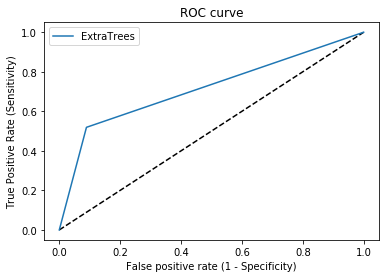

AUC =  0.7148862214637568


In [11]:
#%%
rf_fpr, rf_tpr, rf_thresholds = roc_curve(best[0], best[1], pos_label=1)
roc_auc = auc(rf_fpr, rf_tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr, label='ExtraTrees')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("AUC = ", roc_auc)

In [12]:
#%%
# SVM
model = 0
cont = []
results = pd.DataFrame(columns=('name', 'accuracy'))
kf = KFold(n_splits=10, shuffle=True)
C = [1,2,4,6,8,10]
gamma = [1,2]  
for g in range(len(gamma)):
    acc = []
    name = "SVM RBF Gamma=%.3f" % (gamma[g])     
    for c in range(len(C)):
        fold = 1
        truth = []
        svm_prediction = []
        print("model %d: SVM RBF Gamma=%.3f C=%.2f" % (model, gamma[g], C[c]))        
        test_count = 0
        svm = SVC(C=C[c], kernel='rbf', gamma=gamma[g])
        for train_idx, test_idx in kf.split(X):
            trainX = X[train_idx]
            trainY = Y[train_idx]
            testX = X[test_idx]
            testY = Y[test_idx]
            truth.append(testY)
            svm.fit(trainX, trainY)
            Y_hat = svm.predict(testX)
            svm_prediction.append(Y_hat)
            print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
            fold += 1
        truth = np.concatenate(truth, axis=0)    
        svm_prediction = np.concatenate(svm_prediction, axis=0)
        test_results = np.sum(svm_prediction == truth)/len(truth)
        print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
        svm = svm.fit(X, Y)
        Y_hat = svm.predict(X)
        train_results = np.sum(Y_hat == Y)/len(Y)
        print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
        acc.append([train_results, test_results])   
        cont.append([truth, svm_prediction])
        model += 1
    results = results.append({'name': name, 'accuracy' : acc}, ignore_index=True)

model 0: SVM RBF Gamma=1.000 C=1.00
   Fold 1 accuracy: 71.05 %
   Fold 2 accuracy: 70.53 %
   Fold 3 accuracy: 67.37 %
   Fold 4 accuracy: 74.74 %
   Fold 5 accuracy: 73.16 %
   Fold 6 accuracy: 72.63 %
   Fold 7 accuracy: 68.95 %
   Fold 8 accuracy: 70.53 %
   Fold 9 accuracy: 69.47 %
   Fold 10 accuracy: 73.16 %
     Overall test accuracy: 71.16 %
     Overall training accuracy: 72.89 %
model 1: SVM RBF Gamma=1.000 C=2.00
   Fold 1 accuracy: 75.79 %
   Fold 2 accuracy: 72.63 %
   Fold 3 accuracy: 75.26 %
   Fold 4 accuracy: 68.95 %
   Fold 5 accuracy: 76.84 %
   Fold 6 accuracy: 75.26 %
   Fold 7 accuracy: 74.74 %
   Fold 8 accuracy: 81.05 %
   Fold 9 accuracy: 75.26 %
   Fold 10 accuracy: 76.32 %
     Overall test accuracy: 75.21 %
     Overall training accuracy: 77.53 %
model 2: SVM RBF Gamma=1.000 C=4.00
   Fold 1 accuracy: 73.68 %
   Fold 2 accuracy: 81.05 %
   Fold 3 accuracy: 80.53 %
   Fold 4 accuracy: 71.58 %
   Fold 5 accuracy: 76.84 %
   Fold 6 accuracy: 74.74 %
   Fold 7 

In [13]:
svm = SVC(C=10, kernel='rbf', gamma=2) #79.2%
#svm = SVC(C=2, kernel='rbf', gamma=128) #79.6
#svm = SVC(C=2, kernel='rbf', gamma=128) 
train_num = 1
for i in range(train_num):
    svm.fit(X, Y)
    Y2_hat = svm.predict(X2)
    vm = np.sum(Y2_hat == Ym2)/len(Ym2)
    vn = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

203
vm  0.6448780487804878
vn  0.8097560975609757
nlp
precision:  0.8029556650246306
recall:  0.5125786163522013
F1:  0.6257197696737045
nlp0
precision:  0.8114355231143552
recall:  0.9434229137199435
F1:  0.6257197696737045
ave
precision:  0.8071955940694928
recall:  0.7280007650360724
F1:  0.6257197696737045


In [14]:
#%%

model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("SVM")
print(rf_ct)
print()

Enter Best Model: 11

SVM
          no  social  Total
no      1254     252   1506
social    68     326    394
Total   1322     578   1900



In [15]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.56401 Specificity: 0.94856 PPV: 0.82741 NPV: 0.83267 Accuracy: 0.83158


In [16]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )

print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[1254   68]
 [ 252  326]]
0.6707818930041152
0.5640138408304498
0.8274111675126904
0.8315789473684211
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      1322
          1       0.83      0.56      0.67       578

avg / total       0.83      0.83      0.82      1900



In [17]:
#%%
# RandomForest
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [5, 10, 50, 100, 200, 300, 400, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": Random Forest trees = " + str(trees[t]))
    test_count = 0
    rf = RandomForestClassifier(n_estimators=trees[t], criterion='entropy', n_jobs=-1, )
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : Random Forest trees = 5
   Fold 1 accuracy: 70.00 %
   Fold 2 accuracy: 78.42 %
   Fold 3 accuracy: 80.53 %
   Fold 4 accuracy: 74.21 %
   Fold 5 accuracy: 70.00 %
   Fold 6 accuracy: 77.89 %
   Fold 7 accuracy: 74.21 %
   Fold 8 accuracy: 72.63 %
   Fold 9 accuracy: 71.05 %
   Fold 10 accuracy: 69.47 %
     Overall test accuracy: 73.84 %
     Overall training accuracy: 96.95 %
model  1 : Random Forest trees = 10
   Fold 1 accuracy: 71.58 %
   Fold 2 accuracy: 81.58 %
   Fold 3 accuracy: 72.11 %
   Fold 4 accuracy: 77.37 %
   Fold 5 accuracy: 78.42 %
   Fold 6 accuracy: 74.21 %
   Fold 7 accuracy: 75.79 %
   Fold 8 accuracy: 77.89 %
   Fold 9 accuracy: 77.37 %
   Fold 10 accuracy: 77.89 %
     Overall test accuracy: 76.42 %
     Overall training accuracy: 98.42 %
model  2 : Random Forest trees = 50
   Fold 1 accuracy: 76.32 %
   Fold 2 accuracy: 78.95 %
   Fold 3 accuracy: 76.84 %
   Fold 4 accuracy: 80.00 %
   Fold 5 accuracy: 76.32 %
   Fold 6 accuracy: 77.37 %
   Fold 7 a

In [18]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1, )
train_num = 1
for i in range(train_num):
    rf.fit(X, Y)
    Y2_hat = rf.predict(X2)
    vm = np.sum(Y2_hat == Ym2)/len(Ym2)
    vn = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

149
vm  0.6429268292682927
vn  0.7629268292682927
nlp
precision:  0.7516778523489933
recall:  0.3522012578616352
F1:  0.4796573875802998
nlp0
precision:  0.7648401826484018
recall:  0.9476661951909476
F1:  0.4796573875802998
ave
precision:  0.7582590174986976
recall:  0.6499337265262914
F1:  0.4796573875802998


In [19]:
#%%
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("Random Forest")
print(rf_ct)
print()

Enter Best Model: 7

Random Forest
          no  social  Total
no      1240     321   1561
social    82     257    339
Total   1322     578   1900



In [20]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.44464 Specificity: 0.93797 PPV: 0.75811 NPV: 0.79436 Accuracy: 0.78789


In [21]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[1240   82]
 [ 321  257]]
0.5605234460196292
0.444636678200692
0.7581120943952803
0.7878947368421053
             precision    recall  f1-score   support

          0       0.79      0.94      0.86      1322
          1       0.76      0.44      0.56       578

avg / total       0.78      0.79      0.77      1900



In [22]:
#%%
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)
split = int(len(Y) * 4/5)
trainX = X[:split, :]
trainY = Y[:split]
testX = X[split:, :]
testY = Y[split:]

#%%
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=False, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(trainX, trainY)
print("Training set score: %f" % mlp.score(trainX, trainY))
print("Test set score: %f" % mlp.score(testX, testY))

Training set score: 0.976974
Test set score: 0.834211


In [23]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, alpha=1e-4)
#mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000, alpha=1e-4) 67.5%
mlp.fit(X,Y)

Y2_hat = mlp.predict(X2)
vm = np.sum(Y2_hat == Ym2)/len(Ym2)
vn = np.sum(Y2_hat == Y2)/len(Y2)
print(np.sum(Y2_hat))
print("vm ", vm)
print("vn ",vn)

254
vm  0.6360975609756098
vn  0.8263414634146341


In [24]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(300,),max_iter=500, alpha=1e-4)
#mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000, alpha=1e-4) 67.5%
mlp.fit(X,Y)

Y2_hat = mlp.predict(X2)
vm = np.sum(Y2_hat == Ym2)/len(Ym2)
vn = np.sum(Y2_hat == Y2)/len(Y2)
print(np.sum(Y2_hat))
print("vm ", vm)
print("vn ",vn)

249
vm  0.6390243902439025
vn  0.8273170731707317
